In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from math import exp

Using TensorFlow backend.
/home/mcd0029/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mcd0029/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mcd0029/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mcd0029/anaconda3/lib/python3.7/site-packages/t

In [2]:
# Load MNIST dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

In [3]:
# Reshape into a 1-d array
trainX = trainX.reshape([60000, 784])
testX = testX.reshape([10000, 784])

In [4]:
m = 40 # Number of output nodes
epochs = 25

In [5]:
som = np.random.rand(784, 40) #initialize at random
s = 15 #window size
tau1 = 5  
a = 0.05
tau2 = 5

In [6]:
new_a = a
new_s = s

for e in range(0, epochs):
    # For each epoch
    
    print(f'Epoch {e}')
    
    for img in trainX:
        # For each image in the MNIST dataset

        # Compute function D
        d = np.zeros(m)
        for i in range(m):
            d[i] =  np.sum((som[:, i] - img)**2)
        # Find winner (smallest value)
        winner = np.argmin(d)

        # Update weights
        for i in range(m):
            dist = np.absolute(i - winner)
            h = exp(-(dist**2) / (2*new_s**2))
            delta = new_a * h * (img - som[:, i])
            som[:, i] += delta

        # Update sigma and alpha
        new_a = a * exp(-(e+1)/tau2)
        new_s = s * exp(-(e+1)/tau1)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24


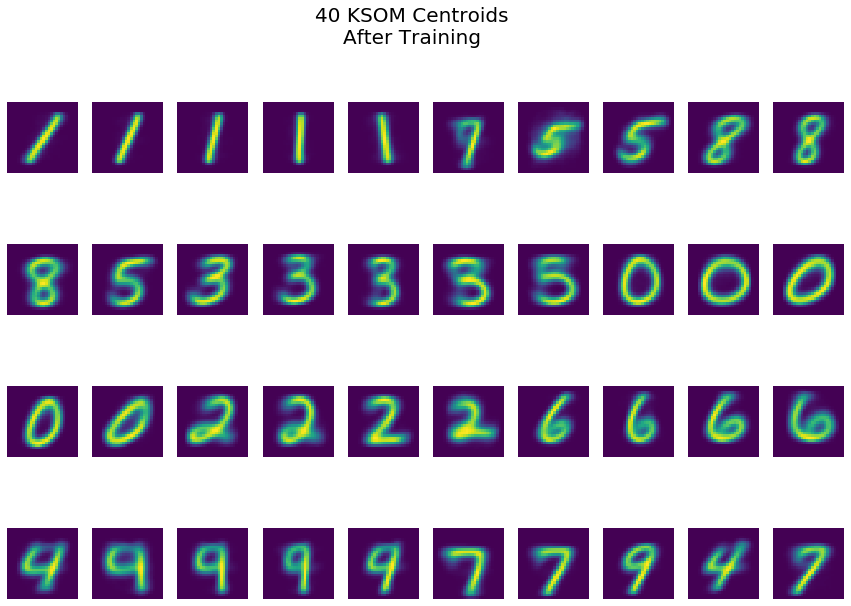

In [7]:
plt.figure(figsize = (15,10))
for j in range(m):
    plt.subplot(4, 10, j+1)
    plot = som[:, j].reshape([28,28])
    plt.imshow(plot)
    plt.axis('off')
    plt.suptitle('40 KSOM Centroids\nAfter Training', fontsize = 20)